In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import geopandas as gpd
import geoplot.crs as gcrs
import geoplot as gplt

In [2]:
# Load the main data frame
df = pd.read_csv('/Users/wooyongjung/WJ_Projects/HomelessStudy_SanFrancisco_2024/data/df_sf_20240911.csv')

In [3]:
df.head()

,image_id,user_id,sequence_id,image_coord,image_timestamp_unix,image_url,image_angle,chunk_id,image_timestamp,year,month,geoid,bboxid,num_tents,confidence,day,hour,GEOID,geometry
0,327669609883423,105986451641170,tpibOxJS5TYZ8V4crsIX9n,"[-122.49810039997101, 37.708604958036545]",1699723630093,https://scontent-iad3-2.xx.fbcdn.net/m1/v/t6/A...,4.955116,chunk_0,2023-11-11 17:27:10.093,2023,11,60750604002,bbox_2_7,NaN,NaN,11,17,60750604002,"POLYGON ((-122.512733380415 37.73508797666425,..."
1,303401841368941,102905365286641,14jeyr2dygbpaexrxv7bqb,"[-122.49807357788086, 37.708991157486594]",1495412840007,https://scontent-iad3-2.xx.fbcdn.net/m1/v/t6/A...,7.626879,chunk_0,2017-05-22 00:27:20.007,2017,5,60750604002,bbox_2_7,0.0,(),22,0,60750604002,"POLYGON ((-122.512733380415 37.73508797666425,..."
2,329903498499807,104408981801642,v66wj3bf8pakks2pq1ws47,"[-122.49806821346283, 37.70853281066343]",1545518762168,https://scontent-iad3-2.xx.fbcdn.net/m1/v/t6/A...,5.560757,chunk_0,2018-12-22 22:46:02.168,2018,12,60750604002,bbox_2_7,0.0,(),22,22,60750604002,"POLYGON ((-122.512733380415 37.73508797666425,..."
3,274600944394813,104408981801642,52l7p54xlo9r92li3feskq,"[-122.4981701374054, 37.708961449908045]",1531338525997,https://scontent-iad3-2.xx.fbcdn.net/m1/v/t6/A...,183.032623,chunk_0,2018-07-11 19:48:45.997,2018,7,60750604002,bbox_2_7,0.0,(),11,19,60750604002,"POLYGON ((-122.512733380415 37.73508797666425,..."
4,519584729064799,104408981801642,d85uqp4g9lwq0vzt32vao1,"[-122.49844908714294, 37.70762884056478]",1531702119180,https://scontent-iad3-2.xx.fbcdn.net/m1/v/t6/A...,185.561066,chunk_0,2018-07-16 00:48:39.180,2018,7,60750604002,bbox_2_7,0.0,(),16,0,60750604002,"POLYGON ((-122.512733380415 37.73508797666425,..."


In [5]:
df.shape

(1852845, 19)

In [6]:
# Add 0 to the beginning of GEOID
df['geoid'] = df['geoid'].astype(str)
df['geoid'] = df['geoid'].apply(lambda x: x.zfill(12))

# Drop GEOID
df = df.drop(columns=['GEOID'])

# Sort the data frame
df = df.sort_values(by=['bboxid', 'user_id', 'sequence_id', 'image_timestamp'])

# Reset index
df = df.reset_index(drop=True)

# Make sure 'image_timestamp' is in datetime format
df['image_timestamp'] = pd.to_datetime(df['image_timestamp_unix'], unit='ms')

In [12]:
df.shape

(1852845, 18)

In [7]:
df.head()

,image_id,user_id,sequence_id,image_coord,image_timestamp_unix,image_url,image_angle,chunk_id,image_timestamp,year,month,geoid,bboxid,num_tents,confidence,day,hour,geometry
0,298146495138429,100526525525168,6vYFOoIaA8dE7CMaYn1Nmg,"[-122.48504877090454, 37.71919288439946]",1439563535348,https://scontent-iad3-2.xx.fbcdn.net/m1/v/t6/A...,0.633789,chunk_8,2015-08-14 14:45:35.348,2015,8,060750604002,bbox_10_14,0.0,(),14,14,"POLYGON ((-122.512733380415 37.73508797666425,..."
1,891122931810788,100526525525168,6vYFOoIaA8dE7CMaYn1Nmg,"[-122.48504877090454, 37.71948991862972]",1439563537347,https://scontent-iad3-2.xx.fbcdn.net/m1/v/t6/A...,1.325195,chunk_8,2015-08-14 14:45:37.347,2015,8,060750604002,bbox_10_14,0.0,(),14,14,"POLYGON ((-122.512733380415 37.73508797666425,..."
2,1099326470576763,100526525525168,6vYFOoIaA8dE7CMaYn1Nmg,"[-122.48505413532257, 37.71990152123725]",1439563539343,https://scontent-iad3-2.xx.fbcdn.net/m1/v/t6/A...,2.151306,chunk_8,2015-08-14 14:45:39.343,2015,8,060750604002,bbox_10_14,0.0,(),14,14,"POLYGON ((-122.512733380415 37.73508797666425,..."
3,150559433609175,100526525525168,6vYFOoIaA8dE7CMaYn1Nmg,"[-122.48505413532257, 37.72004579377487]",1439563541356,https://scontent-iad3-2.xx.fbcdn.net/m1/v/t6/A...,2.729370,chunk_8,2015-08-14 14:45:41.356,2015,8,060750604002,bbox_10_14,0.0,(),14,14,"POLYGON ((-122.512733380415 37.73508797666425,..."
4,158821916084439,100526525525168,6vYFOoIaA8dE7CMaYn1Nmg,"[-122.4850594997406, 37.720321608138306]",1439563543342,https://scontent-iad3-2.xx.fbcdn.net/m1/v/t6/A...,358.439200,chunk_8,2015-08-14 14:45:43.342,2015,8,060750604002,bbox_10_14,0.0,(),14,14,"POLYGON ((-122.512733380415 37.73508797666425,..."


In [8]:
# Load the ground truth data
# Extract image_id info from the 'img_secondary_classifer' folder
joined_files = os.path.join("/Users/wooyongjung/WJ_Projects/HomelessStudy_SanFrancisco_2024/data/img_secondary_classifier/test/yes", "*.jpg")
test_list = glob.glob(joined_files)
joined_files = os.path.join("/Users/wooyongjung/WJ_Projects/HomelessStudy_SanFrancisco_2024/data/img_secondary_classifier/train_and_valid/train/yes", "*.jpg")
train_list = glob.glob(joined_files)
joined_files = os.path.join("/Users/wooyongjung/WJ_Projects/HomelessStudy_SanFrancisco_2024/data/img_secondary_classifier/train_and_valid/val/yes", "*.jpg")
val_list = glob.glob(joined_files)
yes_list = test_list + train_list + val_list

# Extract only the image_id part from the yes_list and no_list
import re
yes_list = [re.search(r"img_\d+", x).group() for x in yes_list]

# Extract only the number from the image_id
yes_list = [re.search(r"\d+", x).group() for x in yes_list]

In [9]:
# Create a ground truth data frame
df_gt = pd.DataFrame({'image_id': yes_list, 'ground_truth': 1})

# Drop duplicates
df_gt = df_gt.drop_duplicates(subset=['image_id'], keep='first')

# Convert dtype of image_id to string
df['image_id'] = df['image_id'].astype(str)

# Merge the ground truth data frame to the main data frame
df = pd.merge(df, df_gt, on='image_id', how='left')

# Fill NaN values with 0
df['ground_truth'] = df['ground_truth'].fillna(0)

In [10]:
df.shape

(1852845, 19)

In [11]:
df['ground_truth'].value_counts()

ground_truth
0.0    1852458
1.0        387
Name: count, dtype: int64

### Address overlapping tents in terms of spatial and temporal aspects

In [21]:
# Temporal aspect of the data
# Create a new column 'time_diff'
df_bbox = df.copy()
df_bbox['time_diff'] = df_bbox.groupby(['bboxid', 'sequence_id', str('ground_truth')], as_index=False)['image_timestamp'].diff()

# Fill NaT values with Inf
df_bbox['time_diff'] = df_bbox['time_diff'].fillna(pd.Timedelta(seconds=1e9))

In [22]:
df_bbox['ground_truth'].value_counts()

ground_truth
0.0    1852458
1.0        387
Name: count, dtype: int64

In [23]:
# Remove the overlapping images taken within 10 seconds in the same bboxid, sequence_id, and num_tents
df_bbox = df_bbox[df_bbox['time_diff'] > pd.Timedelta(seconds=5)]

In [18]:
# # Remove the overlapping images taken within 10 seconds in the same bboxid, sequence_id, and num_tents
# df_bbox_no = df_bbox[df_bbox['ground_truth'] == 0]
# df_bbox_yes = df_bbox[df_bbox['ground_truth'] == 1]
# df_bbox_yes = df_bbox_yes[df_bbox_yes['time_diff'] > pd.Timedelta(seconds=5)]
# df_bbox = pd.concat([df_bbox_no, df_bbox_yes])

In [24]:
# Sort the data frame
df_bbox = df_bbox.sort_values(by=['bboxid', 'user_id', 'sequence_id', 'image_timestamp'])

# Reset index
df_bbox = df_bbox.reset_index(drop=True)

In [25]:
df_bbox['ground_truth'].value_counts()

ground_truth
0.0    112409
1.0       187
Name: count, dtype: int64

In [26]:
# Spatial aspect of the data
from geopy.distance import great_circle

def remove_overlapping_images(df, diameter):
    """
    Removes the overlapping images taken within a certain diameter.

    Parameters:
    - df: pandas DataFrame with 'latitude' and 'longitude' columns
    - diameter: the diameter (in meters) within which points are considered overlapping

    Returns:
    - Filtered DataFrame with non-overlapping points
    """

    # Create a new DataFrame to store non-overlapping points
    filtered_points = []

    for index, row in df.iterrows():
        point = (row['latitude'], row['longitude'])
        # Check if the point is within the specified diameter of any previously added point

        if not any(great_circle(point, (p['latitude'], p['longitude'])).meters <= diameter for p in filtered_points):
            filtered_points.append(row)
        
    return pd.DataFrame(filtered_points)

In [27]:
# Create latitude and longitude columns
df_bbox['latitude'] = df_bbox['image_coord'].apply(lambda x: str(x.split(', ')[1]))
df_bbox['longitude'] = df_bbox['image_coord'].apply(lambda x: str(x.split(', ')[0]))

df_bbox['latitude'] = df_bbox['latitude'].apply(lambda x: float(re.search(r'\d+.\d+', x).group()))
df_bbox['longitude'] = df_bbox['longitude'].apply(lambda x: float(re.search(r'\-\d+.\d+', x).group()))

In [28]:
# Load bbox coordinates
bbox_coord = pd.read_csv('data/df_bbox_99.csv')

# Select the rows with GEOID starting with 06075 (San Francisci County)
bbox_coord['GEOID'] = bbox_coord['GEOID'].astype(str)

# Add 0 to the beginning of GEOID
bbox_coord['GEOID'] = bbox_coord['GEOID'].apply(lambda x: x.zfill(12))
bbox_coord = bbox_coord[bbox_coord['GEOID'].str.startswith('06075')]

# Reset index
bbox_coord.reset_index(inplace=True, drop=True)

# Drop the first column Unnamed: 0
bbox_coord = bbox_coord.drop(['Unnamed: 0'], axis=1)

# Create bboxid column
bbox_coord['bboxid'] = 'bbox_' + bbox_coord.row_num.astype(str) + '_' + bbox_coord.col_num.astype(str)

# Merge the main data frame with the bbox data frame
df_bbox = pd.merge(df_bbox, bbox_coord[['bboxid','swne_edges','center_latlon']], on='bboxid', how='left')

# Create coordinates
df_bbox['swne_edges'] = df_bbox['swne_edges'].apply(lambda x: x[1:-1].split(','))

coords = []
for i in range(len(df_bbox)):
    coord = [(df_bbox['swne_edges'][i][1], df_bbox['swne_edges'][i][0]),
             (df_bbox['swne_edges'][i][3], df_bbox['swne_edges'][i][0]),
             (df_bbox['swne_edges'][i][3], df_bbox['swne_edges'][i][2]),
             (df_bbox['swne_edges'][i][1], df_bbox['swne_edges'][i][2])]
    coords.append(coord)

df_bbox['coords'] = coords

In [29]:
from shapely.geometry import Polygon, LineString, Point, MultiPolygon
# Create a new GeoDataFrame based on coords
# Apply Polygon to coords
df_geo_bbox = df_bbox.copy()
df_geo_bbox['geometry_bbox'] = df_geo_bbox['coords'].apply(Polygon)

# Create a new GeoDataFrame based on coords
df_geo_bbox = gpd.GeoDataFrame(df_geo_bbox, geometry=df_geo_bbox['geometry_bbox'], crs=4326)

In [30]:
# Create a new column 'quarter'
def quarter(row):
    if row['month'] <= 3:
        return 'Q1'
    elif row['month'] <= 6:
        return 'Q2'
    elif row['month'] <= 9:
        return 'Q3'
    else:
        return 'Q4'
    
df_geo_bbox['quarter'] = df_geo_bbox.apply(quarter, axis=1)

In [31]:
# Filter the data frame based on the year (2016-2023)
df_eda = df_geo_bbox[df_geo_bbox['image_timestamp'].dt.year.isin(range(2016, 2024))]

In [31]:
# # Save the data frame
# df_eda.to_csv('data/df_eda.csv', index=False)

In [32]:
df_eda['ground_truth'].value_counts()

ground_truth
0.0    103502
1.0       184
Name: count, dtype: int64

### Merge 311 Dataset

In [33]:
# Load the 311 data
df_311 = pd.read_csv('data/df_311_homeless_sf.csv')

# Convert the 'Opened' column to datetime
df_311['Opened'] = pd.to_datetime(df_311['Opened'])

# Filter the data frame based on the year (2016-2023)
df_311 = df_311[df_311['Opened'].dt.year.isin(range(2016, 2024))]

## Create Year, Month, and Day columns
df_311['Year'] = df_311['Opened'].dt.year
df_311['Month'] = df_311['Opened'].dt.month
df_311['Day'] = df_311['Opened'].dt.day

# Remove Nan values in the 'Point' column
df_311 = df_311[df_311['Point']!= '(0.0, 0.0)']

# Create latitude and longitude columns
df_311['latitude'] = df_311['Point'].apply(lambda x: str(x.split(', ')[0]))
df_311['longitude'] = df_311['Point'].apply(lambda x: str(x.split(', ')[1]))
df_311['latitude'] = df_311['latitude'].apply(lambda x: float(re.search(r'\d+.\d+', x).group()))
df_311['longitude'] = df_311['longitude'].apply(lambda x: float(re.search(r'\-\d+.\d+', x).group()))

/var/folders/y6/z9h695vx2w3gbjh7z32h4j9m0000gn/T/ipykernel_38607/609520551.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_311['Opened'] = pd.to_datetime(df_311['Opened'])


In [34]:
# Remove overlapping points
def remove_overlapping_obs(df, diameter):
    """
    Removes the overlapping observations reported within a certain diameter.

    Parameters:
    - df: pandas DataFrame with 'latitude' and 'longitude' columns
    - *args: columns to group by (conditions)
    - diameter: the diameter (in meters) within which points are considered overlapping

    Returns:
    - Filtered DataFrame with non-overlapping points
    """
    # Create a new DataFrame to store non-overlapping points
    filtered_points = []

    for index, row in df.iterrows():
        point = (row['latitude'], row['longitude'])
        
        # Check if the point is within the specified diameter of any previously added point
        if not any(great_circle(point, (p['latitude'], p['longitude'])).meters <= diameter for p in filtered_points):
            filtered_points.append(row)
        
    return pd.DataFrame(filtered_points)

df_311 = df_311.groupby(['Year', 'Month', 'Day'], as_index=False).apply(remove_overlapping_obs, diameter=10)

/var/folders/y6/z9h695vx2w3gbjh7z32h4j9m0000gn/T/ipykernel_38607/2273380649.py:26: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_311 = df_311.groupby(['Year', 'Month', 'Day'], as_index=False).apply(remove_overlapping_obs, diameter=10)


In [36]:
# Original number of observations
73994+69817+57243+46627+37098+34128+30994+26716

376617

In [37]:
# With diameter=10
df_311.shape

(331372, 12)

In [62]:
# With diameter=50
df_311.shape

(266528, 12)

In [34]:
# With diameter=30
df_311.shape

(288622, 12)

In [38]:
# Drop NaN values
df_311 = df_311.dropna(subset=['Status Notes'])
df_311 = df_311.drop(['Unnamed: 0'], axis=1)

# Filter out specific Status Notes
#df_311 = df_311[~df_311['Status Notes'].str.contains('Duplicate')]
df_311 = df_311[~df_311['Status Notes'].str.contains('Unable to Locate')]
df_311 = df_311[~df_311['Status Notes'].str.contains('Case is Invalid')]

In [39]:
# Add Ground-truth column
def ground_truth(row):
    if 'no encampment in area' in row['Status Notes']:
        return 0
    else:
        return 1
    
df_311['ground_truth'] = df_311.apply(ground_truth, axis=1)

In [40]:
df_311['ground_truth'].value_counts()

ground_truth
1    288989
0     22805
Name: count, dtype: int64

In [41]:
df_eda.head()

,image_id,user_id,sequence_id,image_coord,image_timestamp_unix,image_url,image_angle,chunk_id,image_timestamp,year,...,geometry,ground_truth,time_diff,latitude,longitude,swne_edges,center_latlon,coords,geometry_bbox,quarter
2,324095855714956,107368621499557,1qhC5Z95BUEyIkVUf8cJ7Q,"[-122.4848610162735, 37.720554988720636]",1478700957000,https://scontent-iad3-2.xx.fbcdn.net/m1/v/t6/A...,269.229713,chunk_8,2016-11-09 14:15:57,2016,...,"POLYGON ((-122.48627 37.71914, -122.48443 37.7...",0.0,11574 days 01:46:40,37.720555,-122.484861,"[37.71914041535512, -122.4862707014277, 37.7...","(37.71986168151697, -122.48535268128838)","[( -122.4862707014277, 37.71914041535512), ( -...",POLYGON ((-122.4862707014277 37.71914041535512...,Q4
3,616603892629084,107368621499557,3FVnxNTlCBiqztn3I09gig,"[-122.48467862606049, 37.71923531793384]",1478795352000,https://scontent-iad3-2.xx.fbcdn.net/m1/v/t6/A...,91.110693,chunk_8,2016-11-10 16:29:12,2016,...,"POLYGON ((-122.48627 37.71914, -122.48443 37.7...",0.0,11574 days 01:46:40,37.719235,-122.484679,"[37.71914041535512, -122.4862707014277, 37.7...","(37.71986168151697, -122.48535268128838)","[( -122.4862707014277, 37.71914041535512), ( -...",POLYGON ((-122.4862707014277 37.71914041535512...,Q4
4,1029144440947037,107368621499557,4j7jZ83WcRGw7S9nRmCzDg,"[-122.48486638069153, 37.72055074544389]",1478794725000,https://scontent-iad3-2.xx.fbcdn.net/m1/v/t6/A...,179.014853,chunk_8,2016-11-10 16:18:45,2016,...,"POLYGON ((-122.48627 37.71914, -122.48443 37.7...",0.0,11574 days 01:46:40,37.720551,-122.484866,"[37.71914041535512, -122.4862707014277, 37.7...","(37.71986168151697, -122.48535268128838)","[( -122.4862707014277, 37.71914041535512), ( -...",POLYGON ((-122.4862707014277 37.71914041535512...,Q4
5,3872161929541158,107368621499557,4j7jZ83WcRGw7S9nRmCzDg,"[-122.48477518558502, 37.71918439768969]",1478794778000,https://scontent-iad3-2.xx.fbcdn.net/m1/v/t6/A...,0.000000,chunk_8,2016-11-10 16:19:38,2016,...,"POLYGON ((-122.48627 37.71914, -122.48443 37.7...",0.0,0 days 00:00:33,37.719184,-122.484775,"[37.71914041535512, -122.4862707014277, 37.7...","(37.71986168151697, -122.48535268128838)","[( -122.4862707014277, 37.71914041535512), ( -...",POLYGON ((-122.4862707014277 37.71914041535512...,Q4
6,240641907851575,107368621499557,4j7jZ83WcRGw7S9nRmCzDg,"[-122.4844640493393, 37.719854844767866]",1478794928000,https://scontent-iad3-2.xx.fbcdn.net/m1/v/t6/A...,277.450855,chunk_8,2016-11-10 16:22:08,2016,...,"POLYGON ((-122.48627 37.71914, -122.48443 37.7...",0.0,0 days 00:02:12,37.719855,-122.484464,"[37.71914041535512, -122.4862707014277, 37.7...","(37.71986168151697, -122.48535268128838)","[( -122.4862707014277, 37.71914041535512), ( -...",POLYGON ((-122.4862707014277 37.71914041535512...,Q4


In [42]:
# Create df_mapi with required columns
df_mapi = df_eda[['latitude', 'longitude', 'image_timestamp', 'ground_truth', 'bboxid', 'geometry_bbox']]

# Create df_311_mapi with required columns and remove the rows with (0.0, 0.0) coordinates
df_311_mapi = df_311.copy()
df_311_mapi = df_311_mapi[['Opened', 'Category', 'latitude', 'longitude', 'ground_truth']]
df_311_mapi = df_311_mapi.reset_index(drop=True)

# Rename columns
df_mapi.rename(columns={'image_timestamp': 'timestamp'}, inplace=True)
df_311_mapi.rename(columns={'Opened': 'timestamp', 'Category':'category'}, inplace=True)

# Create a new column
df_mapi['source'] = 'Mapillary'
df_mapi['category'] = 'Homeless Tents'
df_311_mapi['source'] = '311'


/var/folders/y6/z9h695vx2w3gbjh7z32h4j9m0000gn/T/ipykernel_38607/951961412.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mapi.rename(columns={'image_timestamp': 'timestamp'}, inplace=True)
/var/folders/y6/z9h695vx2w3gbjh7z32h4j9m0000gn/T/ipykernel_38607/951961412.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mapi['source'] = 'Mapillary'
/var/folders/y6/z9h695vx2w3gbjh7z32h4j9m0000gn/T/ipykernel_38607/951961412.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [43]:
# Load a geojson file
df_bboxid = gpd.read_file('data/df_bbox_10142024.geojson')
df_bboxid['bboxid'] = 'bbox_' + df_bboxid['row_num'].astype(str) + '_' + df_bboxid['col_num'].astype(str)
df_bboxid = df_bboxid.drop(['row_num', 'col_num'], axis=1)

# Convert df_bboxid to GeoDataFrame
df_bboxid = gpd.GeoDataFrame(df_bboxid, geometry=df_bboxid['geometry'], crs=4326)

# Convert df_311_mapi to GeoDataFrame
df_311_mapi = gpd.GeoDataFrame(df_311_mapi, geometry=gpd.points_from_xy(df_311_mapi.longitude, df_311_mapi.latitude), crs=4326)

In [45]:
df_bboxid.head()

,geometry,bboxid
0,"POLYGON ((-122.51191 37.70765, -122.51008 37.7...",bbox_2_0
1,"POLYGON ((-122.51009 37.70764, -122.50825 37.7...",bbox_2_1
2,"POLYGON ((-122.50826 37.70763, -122.50642 37.7...",bbox_2_2
3,"POLYGON ((-122.50643 37.70762, -122.50460 37.7...",bbox_2_3
4,"POLYGON ((-122.50461 37.70761, -122.50277 37.7...",bbox_2_4


In [46]:
print(df_311_mapi.shape)
print(df_bboxid.shape)

(311794, 7)
(7439, 2)


In [47]:
# Spatial join
df_311_bbox = gpd.sjoin(df_311_mapi, df_bboxid, how='left', op='within')
df_311_bbox = df_311_bbox.drop_duplicates(keep='first')
df_311_bbox = df_311_bbox.reset_index(drop=True)

# Extract only the rows with null bboxid
df_311_null = df_311_bbox[df_311_bbox['bboxid'].isnull()]
df_311_null.drop(['index_right','bboxid'], axis=1, inplace=True)
df_311_null = df_311_null.reset_index(drop=True)

# Drop the null bboxid from df_311_bbox
df_311_bbox = df_311_bbox.dropna(subset=['bboxid'])

# Spatial join using sjoin_nearest for the null bboxid
df_311_null = gpd.sjoin_nearest(df_311_null, df_bboxid, how='left', max_distance=1000)

# Concatenate df_311_bbox and df_311_null
df_311_bbox = pd.concat([df_311_bbox, df_311_null])

# Merge df_311_bbox and df_bboxid to get the geometry_bbox column
df_bboxid_geobbox = df_bboxid.copy()
df_bboxid_geobbox.rename(columns={'geometry': 'geometry_bbox'}, inplace=True)
df_311_bbox = pd.merge(df_311_bbox, df_bboxid_geobbox[['bboxid', 'geometry_bbox']], on='bboxid', how='left')

df_311_bbox.shape


/Users/wooyongjung/anaconda3/envs/homeless_env/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3517: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/var/folders/y6/z9h695vx2w3gbjh7z32h4j9m0000gn/T/ipykernel_38607/2907158745.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_311_null.drop(['index_right','bboxid'], axis=1, inplace=True)
/Users/wooyongjung/anaconda3/envs/homeless_env/lib/python3.11/site-packages/geopandas/array.py:365: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


(313684, 10)

In [48]:
df_311_bbox.head(2)

,timestamp,category,latitude,longitude,ground_truth,source,geometry,index_right,bboxid,geometry_bbox
0,2016-01-01 12:31:03,Encampments,37.741760,-122.422363,1,311,POINT (-122.42236 37.74176),1945.0,bbox_25_48,"POLYGON ((-122.42402 37.74061, -122.42218 37.7..."
1,2016-01-01 14:25:25,Encampments,37.787834,-122.391684,1,311,POINT (-122.39168 37.78783),4682.0,bbox_57_65,"POLYGON ((-122.39259 37.78687, -122.39075 37.7..."


In [49]:
df_mapi.head(2)

,latitude,longitude,timestamp,ground_truth,bboxid,geometry_bbox,source,category
2,37.720555,-122.484861,2016-11-09 14:15:57,0.0,bbox_10_14,POLYGON ((-122.4862707014277 37.71914041535512...,Mapillary,Homeless Tents
3,37.719235,-122.484679,2016-11-10 16:29:12,0.0,bbox_10_14,POLYGON ((-122.4862707014277 37.71914041535512...,Mapillary,Homeless Tents


In [50]:
df_mapi['ground_truth'].value_counts()

ground_truth
0.0    103502
1.0       184
Name: count, dtype: int64

In [51]:
print(df_mapi.shape)
print(df_311_bbox.shape)

(103686, 8)
(313684, 10)


In [52]:
# Concatenate the two data frames
df_combined = pd.concat([df_mapi[['timestamp','bboxid','latitude','longitude','ground_truth','category','source','geometry_bbox']], 
                         df_311_bbox[['timestamp','bboxid','latitude','longitude','ground_truth','category','source','geometry_bbox']]])

In [53]:
df_combined.shape

(417370, 8)

In [54]:
df_combined['ground_truth'].value_counts()

ground_truth
1.0    290925
0.0    126445
Name: count, dtype: int64

In [292]:
df_combined['ground_truth'].value_counts()

ground_truth
1.0    233486
0.0    111454
Name: count, dtype: int64

In [ ]:
#df_combined.to_csv('data/df_combined_final_10142024.csv', index=False)

In [55]:
df_combined.head(3)

,timestamp,bboxid,latitude,longitude,ground_truth,category,source,geometry_bbox
2,2016-11-09 14:15:57,bbox_10_14,37.720555,-122.484861,0.0,Homeless Tents,Mapillary,POLYGON ((-122.4862707014277 37.71914041535512...
3,2016-11-10 16:29:12,bbox_10_14,37.719235,-122.484679,0.0,Homeless Tents,Mapillary,POLYGON ((-122.4862707014277 37.71914041535512...
4,2016-11-10 16:18:45,bbox_10_14,37.720551,-122.484866,0.0,Homeless Tents,Mapillary,POLYGON ((-122.4862707014277 37.71914041535512...


In [56]:
# Convert df_combined to geo data frame
df_combined = gpd.GeoDataFrame(df_combined, geometry='geometry_bbox', crs=4326)
df_combined = df_combined.sort_values(by=['bboxid','timestamp'])
df_combined = df_combined.reset_index(drop=True)

In [57]:
df_combined

,timestamp,bboxid,latitude,longitude,ground_truth,category,source,geometry_bbox
0,2016-11-09 14:15:57,bbox_10_14,37.720555,-122.484861,0.0,Homeless Tents,Mapillary,"POLYGON ((-122.48627 37.71914, -122.48443 37.7..."
1,2016-11-09 14:15:58,bbox_10_14,37.720576,-122.484872,0.0,Homeless Tents,Mapillary,"POLYGON ((-122.48627 37.71914, -122.48443 37.7..."
2,2016-11-09 14:15:58,bbox_10_14,37.720580,-122.484861,0.0,Homeless Tents,Mapillary,"POLYGON ((-122.48627 37.71914, -122.48443 37.7..."
3,2016-11-09 14:15:58,bbox_10_14,37.720508,-122.484888,0.0,Homeless Tents,Mapillary,"POLYGON ((-122.48627 37.71914, -122.48443 37.7..."
4,2016-11-10 16:18:45,bbox_10_14,37.720551,-122.484866,0.0,Homeless Tents,Mapillary,"POLYGON ((-122.48627 37.71914, -122.48443 37.7..."
...,...,...,...,...,...,...,...,...
417365,2016-10-08 12:55:13,bbox_9_68,37.717237,-122.386274,0.0,Homeless Tents,Mapillary,"POLYGON ((-122.38768 37.71722, -122.38584 37.7..."
417366,2016-10-08 12:55:13,bbox_9_68,37.717237,-122.386279,0.0,Homeless Tents,Mapillary,"POLYGON ((-122.38768 37.71722, -122.38584 37.7..."
417367,2016-10-08 12:55:13,bbox_9_68,37.717228,-122.386258,0.0,Homeless Tents,Mapillary,"POLYGON ((-122.38768 37.71722, -122.38584 37.7..."
417368,2022-09-25 09:16:09,bbox_9_68,37.717442,-122.386358,1.0,Encampments,311,"POLYGON ((-122.38768 37.71722, -122.38584 37.7..."


In [58]:
df_combined['source'].value_counts()

source
311          313684
Mapillary    103686
Name: count, dtype: int64

In [59]:
# Extract year, month, and day
df_combined['year'] = df_combined['timestamp'].dt.year
df_combined['month'] = df_combined['timestamp'].dt.month
df_combined['day'] = df_combined['timestamp'].dt.day

In [60]:
df_combined.head(3)

,timestamp,bboxid,latitude,longitude,ground_truth,category,source,geometry_bbox,year,month,day
0,2016-11-09 14:15:57,bbox_10_14,37.720555,-122.484861,0.0,Homeless Tents,Mapillary,"POLYGON ((-122.48627 37.71914, -122.48443 37.7...",2016,11,9
1,2016-11-09 14:15:58,bbox_10_14,37.720576,-122.484872,0.0,Homeless Tents,Mapillary,"POLYGON ((-122.48627 37.71914, -122.48443 37.7...",2016,11,9
2,2016-11-09 14:15:58,bbox_10_14,37.720580,-122.484861,0.0,Homeless Tents,Mapillary,"POLYGON ((-122.48627 37.71914, -122.48443 37.7...",2016,11,9


In [61]:
df_combined[df_combined['source']=='Mapillary']['ground_truth'].value_counts()

ground_truth
0.0    103502
1.0       184
Name: count, dtype: int64

In [62]:
4414*365

1611110

In [63]:
df_combined.shape

(417370, 11)

In [64]:
df_combined['bboxid'].nunique()

4415

In [65]:
df_combined.shape

(417370, 11)

In [66]:
type(df_combined)

geopandas.geodataframe.GeoDataFrame

In [67]:
# Remove overlapping observations (within 10 meters)
df_combined2 = df_combined.groupby(['bboxid','year', 'month', 'day'], as_index=False).apply(remove_overlapping_obs, diameter=10)

/var/folders/y6/z9h695vx2w3gbjh7z32h4j9m0000gn/T/ipykernel_38607/2975394455.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_combined2 = df_combined.groupby(['bboxid','year', 'month', 'day'], as_index=False).apply(remove_overlapping_obs, diameter=10)


In [69]:
# Save df_combined2 as a geojson file
df_combined2.to_csv('data/df_combined_final2_10182024.csv', index=False)

# # Load the data frame
# df_combined2 = pd.read_csv('data/df_combined_final2_10142024.csv')

In [68]:
df_combined2.shape

(371062, 11)

In [71]:
df_combined2.head()

timestamp      bboxid   latitude   longitude  ground_truth  \
0 0  2016-11-09 14:15:57  bbox_10_14  37.720555 -122.484861           0.0   
1 4  2016-11-10 16:18:45  bbox_10_14  37.720551 -122.484866           0.0   
  7  2016-11-10 16:19:38  bbox_10_14  37.719184 -122.484775           0.0   
  10 2016-11-10 16:22:08  bbox_10_14  37.719855 -122.484464           0.0   
  16 2016-11-10 16:29:12  bbox_10_14  37.719235 -122.484679           0.0   

            category     source  \
0 0   Homeless Tents  Mapillary   
1 4   Homeless Tents  Mapillary   
  7   Homeless Tents  Mapillary   
  10  Homeless Tents  Mapillary   
  16  Homeless Tents  Mapillary   

                                          geometry_bbox  year  month  day  
0 0   POLYGON ((-122.4862707014277 37.71914041535512...  2016     11    9  
1 4   POLYGON ((-122.4862707014277 37.71914041535512...  2016     11   10  
  7   POLYGON ((-122.4862707014277 37.71914041535512...  2016     11   10  
  10  POLYGON ((-122.4862707014277 37.71914041535512...  2016     11   10  
  16  POLYGON ((-122.4862707014277 37.71914041535512...  2016     11   10

In [73]:
df_combined2['ground_truth_bin'] = df_combined2['ground_truth'].apply(lambda x: 1 if x>0 else 0)

In [74]:
# Separate the data frame for groupby
group_col = ['bboxid','year', 'month', 'day', 'ground_truth']
df_combined_grp = df_combined2[group_col]
df_combined_grp = df_combined_grp.groupby(['bboxid','year', 'month', 'day']).sum().reset_index()

In [75]:
df_combined_grp.head(2)

,bboxid,year,month,day,ground_truth
0,bbox_10_14,2016,11,9,0.0
1,bbox_10_14,2016,11,10,0.0


In [76]:
df_combined_grp['ground_truth'].value_counts()

ground_truth
1.0     171978
0.0      44765
2.0      32508
3.0       9499
4.0       3271
5.0       1210
6.0        505
7.0        222
8.0         90
9.0         50
10.0        27
12.0         6
11.0         5
13.0         5
15.0         2
Name: count, dtype: int64

### Month-based

In [93]:
df_combined_month = df_combined_grp[['bboxid','year','month','ground_truth']]
df_combined_month['ground_truth_bin'] = df_combined_month['ground_truth'].apply(lambda x: 1 if x>0 else 0)
df_combined_month = df_combined_month.groupby(['bboxid','year', 'month']).mean().reset_index()



In [95]:
df_combined_month

,bboxid,year,month,ground_truth,ground_truth_bin
0,bbox_10_14,2016,11,0.0,0.0
1,bbox_10_14,2023,11,1.0,1.0
2,bbox_10_15,2016,11,0.0,0.0
3,bbox_10_16,2016,11,0.0,0.0
4,bbox_10_17,2016,11,0.0,0.0
...,...,...,...,...,...
82588,bbox_9_67,2016,9,1.0,1.0
82589,bbox_9_67,2016,10,0.0,0.0
82590,bbox_9_68,2016,10,0.0,0.0
82591,bbox_9_68,2022,9,1.0,1.0


In [96]:
# Sort the data frame
df_combined_month = df_combined_month.sort_values(by=['bboxid','year','month'])
df_combined_month.head()

,bboxid,year,month,ground_truth,ground_truth_bin
0,bbox_10_14,2016,11,0.0,0.0
1,bbox_10_14,2023,11,1.0,1.0
2,bbox_10_15,2016,11,0.0,0.0
3,bbox_10_16,2016,11,0.0,0.0
4,bbox_10_17,2016,11,0.0,0.0


In [97]:
# Convert year and month to datetime timestamp
df_combined_month['timestamp'] = pd.to_datetime(df_combined_month[['year', 'month']].assign(day=1))

In [98]:
df_combined_month.shape

(82593, 6)

In [99]:
# Create a complete date range for each group
full_date_range = pd.date_range(start=df_combined_month['timestamp'].min(), end=df_combined_month['timestamp'].max(), freq='MS')

# Function to reindex each group by full monthly date range
def reindex_group(group):
    
    # Reindex the group based on the full date range
    group = group.set_index('timestamp').reindex(full_date_range).reset_index()
    
    # Rename the index column back to 'date'
    group = group.rename(columns={'index': 'timestamp'})
    
    # Fill the group_id back in for the missing dates
    group['bboxid'] = group['bboxid'].fillna(method='ffill').fillna(method='bfill')
    
    return group

# Apply the reindexing function to each group
df_combined_month = df_combined_month.groupby('bboxid').apply(reindex_group).reset_index(drop=True)

/var/folders/y6/z9h695vx2w3gbjh7z32h4j9m0000gn/T/ipykernel_38607/2079019881.py:14: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  group['bboxid'] = group['bboxid'].fillna(method='ffill').fillna(method='bfill')
/var/folders/y6/z9h695vx2w3gbjh7z32h4j9m0000gn/T/ipykernel_38607/2079019881.py:14: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  group['bboxid'] = group['bboxid'].fillna(method='ffill').fillna(method='bfill')
/var/folders/y6/z9h695vx2w3gbjh7z32h4j9m0000gn/T/ipykernel_38607/2079019881.py:14: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  group['bboxid'] = group['bboxid'].fillna(method='ffill').fillna(method='bfill')
/var/folders/y6/z9h695vx2w3gbjh7z32h4j9m0000gn/T/ipykernel_38607/2079019881.py:14: FutureWarning: Series.f

In [100]:
# Total length: 12 months * 8 years * 4414 bboxids = 423,744
print(df_combined_month.shape)

(423840, 6)


In [101]:
df_combined_month.head()

,timestamp,bboxid,year,month,ground_truth,ground_truth_bin
0,2016-01-01,bbox_10_14,NaN,NaN,NaN,NaN
1,2016-02-01,bbox_10_14,NaN,NaN,NaN,NaN
2,2016-03-01,bbox_10_14,NaN,NaN,NaN,NaN
3,2016-04-01,bbox_10_14,NaN,NaN,NaN,NaN
4,2016-05-01,bbox_10_14,NaN,NaN,NaN,NaN


In [102]:
# Extract year, month, and day
df_combined_month['year'] = df_combined_month['timestamp'].dt.year
df_combined_month['month'] = df_combined_month['timestamp'].dt.month

In [103]:
df_combined_month[df_combined_month['bboxid']=='bbox_40_43'].head(5)

,timestamp,bboxid,year,month,ground_truth,ground_truth_bin
207072,2016-01-01,bbox_40_43,2016,1,NaN,NaN
207073,2016-02-01,bbox_40_43,2016,2,1.00,1.0
207074,2016-03-01,bbox_40_43,2016,3,1.40,1.0
207075,2016-04-01,bbox_40_43,2016,4,1.00,1.0
207076,2016-05-01,bbox_40_43,2016,5,1.25,1.0


## Time-series Trend 

In [104]:
df_trend = df_combined_month[['timestamp','ground_truth','ground_truth_bin']]
df_trend = df_trend.groupby('timestamp').sum().reset_index()

In [105]:
df_trend.head()

,timestamp,ground_truth,ground_truth_bin
0,2016-01-01,577.892667,526.102211
1,2016-02-01,610.709015,560.743712
2,2016-03-01,603.795258,543.451984
3,2016-04-01,588.527386,528.613759
4,2016-05-01,656.115142,587.951581


In [88]:
df_trend.head(30)

,timestamp,ground_truth,ground_truth_bin
0,2016-01-01,1933.0,1550.0
1,2016-02-01,1945.0,1619.0
2,2016-03-01,2270.0,1776.0
3,2016-04-01,2402.0,1869.0
4,2016-05-01,2744.0,2110.0
5,2016-06-01,2815.0,2130.0
6,2016-07-01,2565.0,2029.0
7,2016-08-01,3116.0,2426.0
8,2016-09-01,3196.0,2499.0
9,2016-10-01,2901.0,2281.0


In [106]:
# Create a data frame for SF PIT Count datasets
year = ['2015-02-01','2017-02-01','2019-02-01','2022-02-01','2024-01-01']
unsheltered = [4358, 4353, 5180, 4397, 4354]
df_pit = pd.DataFrame({'year':year, 'unsheltered':unsheltered})
df_pit['year'] = pd.to_datetime(df_pit['year'])
df_pit

,year,unsheltered
0,2015-02-01,4358
1,2017-02-01,4353
2,2019-02-01,5180
3,2022-02-01,4397
4,2024-01-01,4354


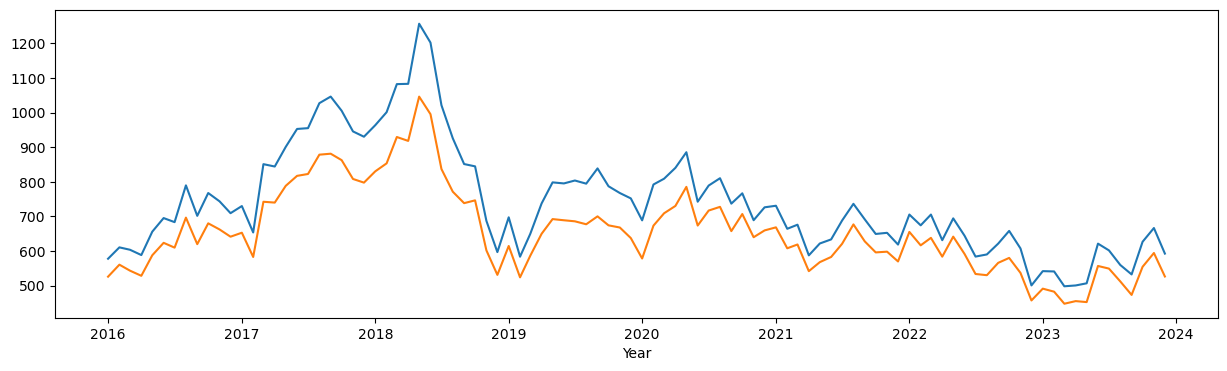

In [108]:
# Time trend plots
plt.figure(figsize=(15, 4))
plt.plot(df_trend['timestamp'], df_trend['ground_truth'], label='Number of Tents')
plt.plot(df_trend['timestamp'], df_trend['ground_truth_bin'], label='days with Tents')
#plt.plot(df_pit['year'], df_pit['unsheltered'], 'ro-', label='PIT Count')
plt.xlabel('Year')
plt.show()

In [109]:
df_combined_grp.head()

,bboxid,year,month,day,ground_truth
0,bbox_10_14,2016,11,9,0.0
1,bbox_10_14,2016,11,10,0.0
2,bbox_10_14,2023,11,3,1.0
3,bbox_10_15,2016,11,10,0.0
4,bbox_10_16,2016,11,9,0.0


In [110]:
# Create a daily trend data frame
df_trend_day = df_combined_grp.copy()

# Create a timestamp using year, month, and day
df_trend_day['timestamp'] = pd.to_datetime(df_trend_day[['year', 'month', 'day']])

# Group by timestamp
df_trend_day = df_trend_day.groupby('timestamp').sum().reset_index()

In [111]:
df_trend_day = df_trend_day[['timestamp','ground_truth']]

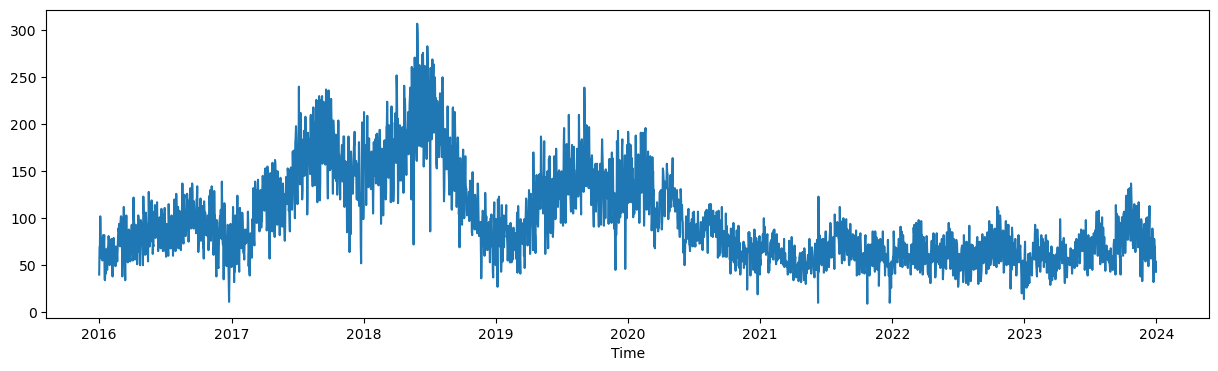

In [112]:
# Time trend plots
plt.figure(figsize=(15, 4))
plt.plot(df_trend_day['timestamp'], df_trend_day['ground_truth'], label='Number of Tents')
#plt.plot(df_pit['year'], df_pit['unsheltered'], 'ro-', label='PIT Count')
plt.xlabel('Time')
plt.show()

/var/folders/y6/z9h695vx2w3gbjh7z32h4j9m0000gn/T/ipykernel_38607/1560277993.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  ax2.plot(df_pit['year'], df_pit['unsheltered'], 'ro-', label='PIT Count', color='r')


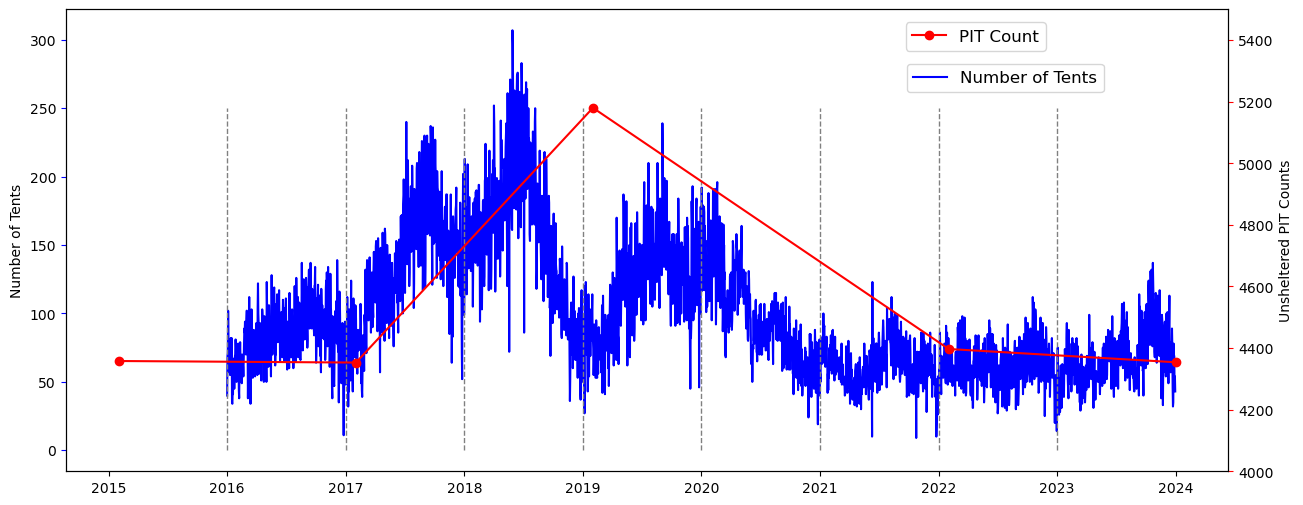

In [113]:
fig, ax1 = plt.subplots(figsize=(15, 6))
ax1.plot(df_trend_day['timestamp'], df_trend_day['ground_truth'], label='Number of Tents', color='b')
ax1.set_ylabel('Number of Tents')
ax1.tick_params('y', color='b')
ax2 = ax1.twinx()
ax2.plot(df_pit['year'], df_pit['unsheltered'], 'ro-', label='PIT Count', color='r')
ax2.tick_params('y', color='r')
ax2.set_ylabel('Unsheltered PIT Counts')
plt.ylim([4000, 5500])
ax1.legend(loc='upper right', fontsize=12, bbox_to_anchor=(0.9, 0.9))
ax2.legend(loc='upper right', fontsize=12, bbox_to_anchor=(0.85, 0.99))
ax1.vlines(x = ['2016-01-01', '2017-01-01', '2018-01-01', '2019-01-01', '2020-01-01', '2021-01-01', '2022-01-01', '2023-01-01'], 
            color = 'grey', linestyle = '--', linewidth = 1, ymin=0, ymax=250)
plt.show()

In [114]:
df_combined2.head()

timestamp      bboxid   latitude   longitude  ground_truth  \
0 0  2016-11-09 14:15:57  bbox_10_14  37.720555 -122.484861           0.0   
1 4  2016-11-10 16:18:45  bbox_10_14  37.720551 -122.484866           0.0   
  7  2016-11-10 16:19:38  bbox_10_14  37.719184 -122.484775           0.0   
  10 2016-11-10 16:22:08  bbox_10_14  37.719855 -122.484464           0.0   
  16 2016-11-10 16:29:12  bbox_10_14  37.719235 -122.484679           0.0   

            category     source  \
0 0   Homeless Tents  Mapillary   
1 4   Homeless Tents  Mapillary   
  7   Homeless Tents  Mapillary   
  10  Homeless Tents  Mapillary   
  16  Homeless Tents  Mapillary   

                                          geometry_bbox  year  month  day  \
0 0   POLYGON ((-122.4862707014277 37.71914041535512...  2016     11    9   
1 4   POLYGON ((-122.4862707014277 37.71914041535512...  2016     11   10   
  7   POLYGON ((-122.4862707014277 37.71914041535512...  2016     11   10   
  10  POLYGON ((-122.4862707014277 37.71914041535512...  2016     11   10   
  16  POLYGON ((-122.4862707014277 37.71914041535512...  2016     11   10   

      ground_truth_bin  
0 0                  0  
1 4                  0  
  7                  0  
  10                 0  
  16                 0

In [115]:
df_combined_grp.head()

,bboxid,year,month,day,ground_truth
0,bbox_10_14,2016,11,9,0.0
1,bbox_10_14,2016,11,10,0.0
2,bbox_10_14,2023,11,3,1.0
3,bbox_10_15,2016,11,10,0.0
4,bbox_10_16,2016,11,9,0.0


In [116]:
df_combined_month.shape

(423840, 6)

In [117]:
df_combined_month.head(20)

,timestamp,bboxid,year,month,ground_truth,ground_truth_bin
0,2016-01-01,bbox_10_14,2016,1,NaN,NaN
1,2016-02-01,bbox_10_14,2016,2,NaN,NaN
2,2016-03-01,bbox_10_14,2016,3,NaN,NaN
3,2016-04-01,bbox_10_14,2016,4,NaN,NaN
4,2016-05-01,bbox_10_14,2016,5,NaN,NaN
5,2016-06-01,bbox_10_14,2016,6,NaN,NaN
6,2016-07-01,bbox_10_14,2016,7,NaN,NaN
7,2016-08-01,bbox_10_14,2016,8,NaN,NaN
8,2016-09-01,bbox_10_14,2016,9,NaN,NaN
9,2016-10-01,bbox_10_14,2016,10,NaN,NaN


In [118]:
df_combined.shape

(417370, 11)

### Spatial Aspect

In [86]:
# Load the df_bbox_10142024.geojson file
df_bboxid = gpd.read_file('data/df_bbox_10142024.geojson')
df_bboxid.head()

,row_num,col_num,geometry
0,2,0,"POLYGON ((-122.51191 37.70765, -122.51008 37.7..."
1,2,1,"POLYGON ((-122.51009 37.70764, -122.50825 37.7..."
2,2,2,"POLYGON ((-122.50826 37.70763, -122.50642 37.7..."
3,2,3,"POLYGON ((-122.50643 37.70762, -122.50460 37.7..."
4,2,4,"POLYGON ((-122.50461 37.70761, -122.50277 37.7..."


In [90]:
# Create bboxid column
df_bboxid['bboxid'] = 'bbox_' + df_bboxid['row_num'].astype(str) + '_' + df_bboxid['col_num'].astype(str)

# # Merge df_combined2 and df_bboxid
# df_combined2 = pd.merge(df_combined2['timestamp',''], df_bboxid[['bboxid','geometry']], on='bboxid', how='left')

In [91]:
type(df_bboxid)

geopandas.geodataframe.GeoDataFrame

In [93]:
df_bboxid.shape

(7439, 4)

In [92]:
df_bboxid.head()

,row_num,col_num,geometry,bboxid
0,2,0,"POLYGON ((-122.51191 37.70765, -122.51008 37.7...",bbox_2_0
1,2,1,"POLYGON ((-122.51009 37.70764, -122.50825 37.7...",bbox_2_1
2,2,2,"POLYGON ((-122.50826 37.70763, -122.50642 37.7...",bbox_2_2
3,2,3,"POLYGON ((-122.50643 37.70762, -122.50460 37.7...",bbox_2_3
4,2,4,"POLYGON ((-122.50461 37.70761, -122.50277 37.7...",bbox_2_4


In [94]:
df_combined2.shape

(295744, 12)

In [69]:
df_combined2.head()

,timestamp,bboxid,latitude,longitude,ground_truth,category,source,geometry_bbox,year,month,day,ground_truth_bin
0,2016-11-09 14:15:57.000,bbox_10_14,37.720555,-122.484861,0.0,Homeless Tents,Mapillary,POLYGON ((-122.4862707014277 37.71914041535512...,2016,11,9,0
1,2016-11-10 16:18:45.000,bbox_10_14,37.720551,-122.484866,0.0,Homeless Tents,Mapillary,POLYGON ((-122.4862707014277 37.71914041535512...,2016,11,10,0
2,2016-11-10 16:19:38.000,bbox_10_14,37.719184,-122.484775,0.0,Homeless Tents,Mapillary,POLYGON ((-122.4862707014277 37.71914041535512...,2016,11,10,0
3,2016-11-10 16:22:08.000,bbox_10_14,37.719855,-122.484464,0.0,Homeless Tents,Mapillary,POLYGON ((-122.4862707014277 37.71914041535512...,2016,11,10,0
4,2023-11-03 17:59:05.000,bbox_10_14,37.720383,-122.484852,1.0,Encampments,311,POLYGON ((-122.4862707014277 37.71914041535512...,2023,11,3,1


<Axes: >

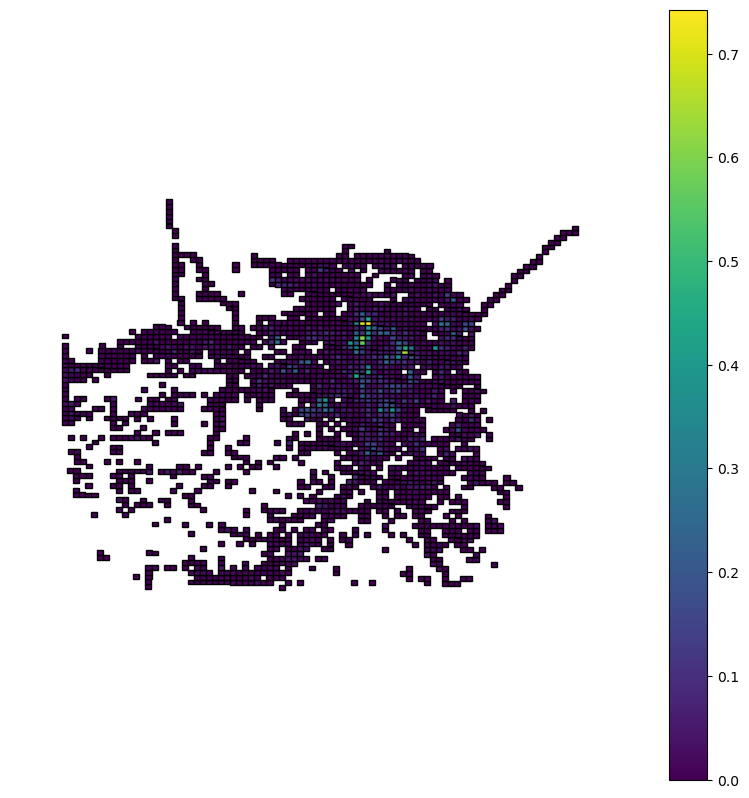

In [126]:
# Extract only 2022 data
df_2022 = df_combined2[df_combined2['year']==2022]

# Group by bboxid
df_2022_grp = df_2022[['bboxid','ground_truth']].groupby('bboxid').sum()
df_2022_grp = df_2022_grp.reset_index()
df_2022_loc = df_2022[['bboxid','geometry_bbox']].drop_duplicates()
df_2022_loc = df_2022_loc.reset_index(drop=True)
df_2022_grp = pd.merge(df_2022_grp, df_2022_loc, on='bboxid', how='left')

# Calculate the average of the number of tents
df_2022_grp['avg_tents'] = df_2022_grp['ground_truth']/365
df_2022_grp.shape

# Merge df_2022_grp and df_bboxid
df_2022_grp = pd.merge(df_2022_grp[['bboxid','ground_truth','avg_tents']], df_bboxid[['bboxid','geometry']], on='bboxid', how='left')

# Convert df_2022_grp to GeoDataFrame
df_2022_grp = gpd.GeoDataFrame(df_2022_grp, geometry='geometry', crs=4326)

gplt.choropleth(df_2022_grp, hue='avg_tents', cmap='viridis', figsize=(10, 10), legend=True)

In [130]:
?gplt.choropleth

Signature:
gplt.choropleth(
    df,
    projection=None,
    hue=None,
    cmap=None,
    norm=None,
    scheme=None,
    legend=False,
    legend_kwargs=None,
    legend_labels=None,
    legend_values=None,
    extent=None,
    figsize=(8, 6),
    ax=None,
    **kwargs,
)
Docstring:
A color-mapped area plot.

Parameters
----------

df : GeoDataFrame
    The data being plotted.
projection : geoplot.crs object instance, optional
    The projection to use. For reference see
    :ref:`/user_guide/Working_with_Projections.ipynb`.
hue : None, Series, GeoSeries, iterable, or str, optional
    The column in the dataset (or an iterable of some other data) used to color the points.
    For a reference on this and the other hue-related parameters that follow, see
    :ref:`/user_guide/Customizing_Plots.ipynb#hue`.
cmap : matplotlib color, optional
    The
    `colormap <https://matplotlib.org/examples/color/colormaps_reference.html>`_ to use.
norm: function, optional
    A `colormap normalizatio

In [ ]:
# Draw a map for each year
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

# Normalize the data column between the desired range
vmin, vmax = 0, 100

for year in years:
    df_year = df_combined2[df_combined2['year']==year]
    df_year_grp = df_year[['bboxid','ground_truth']].groupby('bboxid').sum()
    df_year_grp = df_year_grp.reset_index()
    df_year_loc = df_year[['bboxid','geometry_bbox']].drop_duplicates()
    df_year_loc = df_year_loc.reset_index(drop=True)
    df_year_grp = pd.merge(df_year_grp, df_year_loc, on='bboxid', how='left')
    df_year_grp['avg_tents'] = df_year_grp['ground_truth']/365
    df_year_grp['avg_tents_norm'] = np.clip(df_year_grp['avg_tents'], 0, 100)
    df_year_grp = pd.merge(df_year_grp[['bboxid','ground_truth','avg_tents_norm']], df_bboxid[['bboxid','geometry']], on='bboxid', how='left')
    df_year_grp = gpd.GeoDataFrame(df_year_grp, geometry='geometry', crs=4326)
    gplt.choropleth(df_year_grp, hue='avg_tents_norm', cmap='magma_r', figsize=(10, 10),
                    legend=True, legend_kwargs={'shrink': 0.5}, linewidth=0.2, edgecolor='black')
    plt.title(f'Year {year}')
    plt.show()

In [151]:
df_year.head()

,timestamp,bboxid,latitude,longitude,ground_truth,category,source,geometry_bbox,year,month,day,ground_truth_bin
4,2023-11-03 17:59:05.000,bbox_10_14,37.720383,-122.484852,1.0,Encampments,311,POLYGON ((-122.4862707014277 37.71914041535512...,2023,11,3,1
148,2023-02-16 15:43:00.000,bbox_10_29,37.720087,-122.457818,1.0,Encampments,311,POLYGON ((-122.4588806984715 37.71901788050796...,2023,2,16,1
217,2023-01-02 12:06:56.000,bbox_10_34,37.719834,-122.449512,1.0,Encampments,311,POLYGON ((-122.4497507348996 37.71897562158424...,2023,1,2,1
218,2023-01-02 18:35:28.617,bbox_10_34,37.719019,-122.448254,0.0,Homeless Tents,Mapillary,POLYGON ((-122.4497507348996 37.71897562158424...,2023,1,2,0
219,2023-08-19 16:34:38.847,bbox_10_34,37.720356,-122.448362,0.0,Homeless Tents,Mapillary,POLYGON ((-122.4497507348996 37.71897562158424...,2023,8,19,0


In [153]:
df_2023 = df_combined2[df_combined2['year']==2023]

# Create a new column 'quarter'
def quarter(row):
    if row['month'] <= 3:
        return 'Q1'
    elif row['month'] <= 6:
        return 'Q2'
    elif row['month'] <= 9:
        return 'Q3'
    else:
        return 'Q4'
    
df_2023['quarter'] = df_2023.apply(quarter, axis=1)

/var/folders/y6/z9h695vx2w3gbjh7z32h4j9m0000gn/T/ipykernel_30235/2214584309.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['quarter'] = df_2023.apply(quarter, axis=1)


In [156]:
df_2023.head()

,timestamp,bboxid,latitude,longitude,ground_truth,category,source,geometry_bbox,year,month,day,ground_truth_bin,quarter
4,2023-11-03 17:59:05.000,bbox_10_14,37.720383,-122.484852,1.0,Encampments,311,POLYGON ((-122.4862707014277 37.71914041535512...,2023,11,3,1,Q4
148,2023-02-16 15:43:00.000,bbox_10_29,37.720087,-122.457818,1.0,Encampments,311,POLYGON ((-122.4588806984715 37.71901788050796...,2023,2,16,1,Q1
217,2023-01-02 12:06:56.000,bbox_10_34,37.719834,-122.449512,1.0,Encampments,311,POLYGON ((-122.4497507348996 37.71897562158424...,2023,1,2,1,Q1
218,2023-01-02 18:35:28.617,bbox_10_34,37.719019,-122.448254,0.0,Homeless Tents,Mapillary,POLYGON ((-122.4497507348996 37.71897562158424...,2023,1,2,0,Q1
219,2023-08-19 16:34:38.847,bbox_10_34,37.720356,-122.448362,0.0,Homeless Tents,Mapillary,POLYGON ((-122.4497507348996 37.71897562158424...,2023,8,19,0,Q3


In [158]:

df_2023_grp = df_2023[['bboxid','ground_truth','quarter']].groupby(['bboxid', 'quarter']).sum()
df_2023_grp = df_2023_grp.reset_index()
#df_2023_loc = df_2023[['bboxid','geometry_bbox']].drop_duplicates()
#df_2023_loc = df_2023_loc.reset_index(drop=True)
#df_2023_grp = pd.merge(df_2023_grp, df_2023_loc, on='bboxid', how='left')
df_2023_grp['avg_tents'] = df_2023_grp['ground_truth']/365
df_2023_grp = pd.merge(df_2023_grp[['bboxid','quarter','ground_truth','avg_tents']], df_bboxid[['bboxid','geometry']], on='bboxid', how='left')
df_2023_grp = gpd.GeoDataFrame(df_2023_grp, geometry='geometry', crs=4326)
df_2023_grp.head()

,bboxid,quarter,ground_truth,avg_tents,geometry
0,bbox_10_14,Q4,1.0,0.00274,"POLYGON ((-122.48627 37.71914, -122.48443 37.7..."
1,bbox_10_29,Q1,1.0,0.00274,"POLYGON ((-122.45888 37.71902, -122.45704 37.7..."
2,bbox_10_34,Q1,1.0,0.00274,"POLYGON ((-122.44975 37.71898, -122.44791 37.7..."
3,bbox_10_34,Q3,0.0,0.00000,"POLYGON ((-122.44975 37.71898, -122.44791 37.7..."
4,bbox_10_34,Q4,0.0,0.00000,"POLYGON ((-122.44975 37.71898, -122.44791 37.7..."


In [ ]:
qs = ['Q1', 'Q2', 'Q3', 'Q4']
for q in qs:
    df_2023_grp_q = df_2023_grp[df_2023_grp['quarter']==q]
    df_2023_grp_q = df_2023_grp_q.reset_index(drop=True)
    gplt.choropleth(df_2023_grp_q, hue='avg_tents', cmap='viridis', figsize=(10, 10), legend=True)
    plt.title(f'Quarter {q}')
    plt.show()

In [135]:
# Load SF tent data
df_sf = pd.read_csv('data/sf_tent.csv')

# Add timestamp column using year and month
df_sf['timestamp'] = pd.to_datetime(df_sf[['year', 'month']].assign(day=1))

df_sf['tent_struc'] = df_sf['tents'] + df_sf['structure']

df_sf

,year,month,tents,structure,sites,timestamp,tent_struc
0,2019,4,207,173,442,2019-04-01,380
1,2019,7,264,187,437,2019-07-01,451
2,2019,10,272,175,501,2019-10-01,447
3,2020,1,459,190,601,2020-01-01,649
4,2020,4,897,211,427,2020-04-01,1108
5,2020,7,790,213,426,2020-07-01,1003
6,2020,10,434,269,530,2020-10-01,703
7,2020,12,349,216,434,2020-12-01,565
8,2021,2,333,168,499,2021-02-01,501
9,2021,4,289,94,305,2021-04-01,383


In [120]:
df_trend_day

,timestamp,ground_truth
0,2016-01-01,40.0
1,2016-01-02,69.0
2,2016-01-03,71.0
3,2016-01-04,102.0
4,2016-01-05,85.0
...,...,...
2917,2023-12-27,69.0
2918,2023-12-28,69.0
2919,2023-12-29,46.0
2920,2023-12-30,54.0


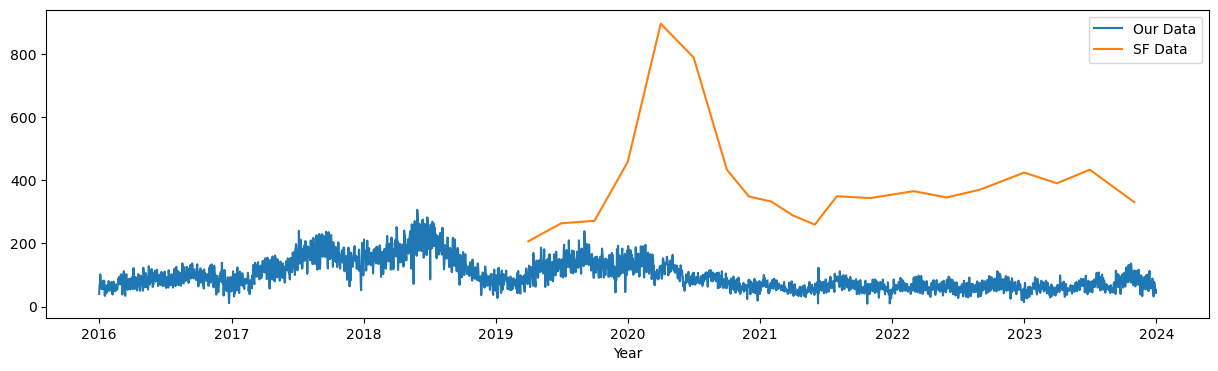

In [121]:
# Time trend plots
plt.figure(figsize=(15, 4))
plt.plot(df_trend_day['timestamp'], df_trend_day['ground_truth'], label='Our Data')
plt.plot(df_sf['timestamp'], df_sf['tents'], label='SF Data')
#plt.plot(df_pit['year'], df_pit['unsheltered'], 'ro-', label='PIT Count')
plt.xlabel('Year')
plt.legend()
plt.show()

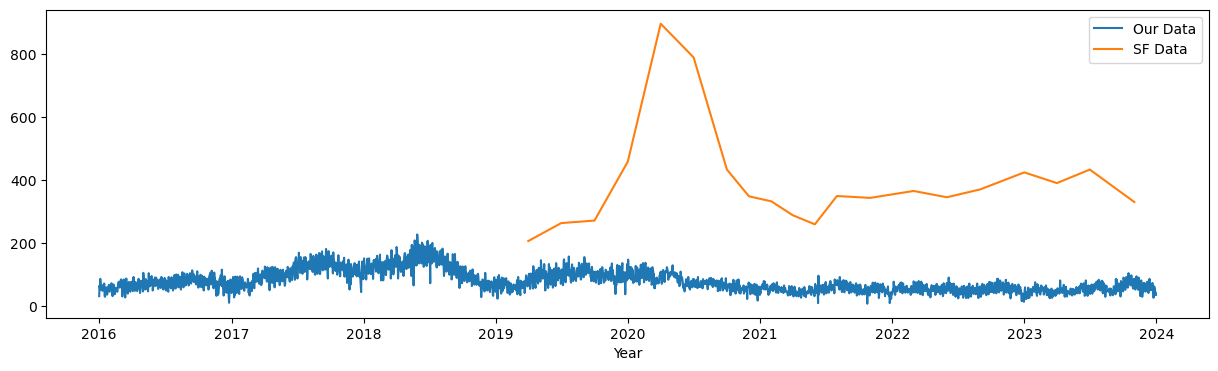

In [167]:
# Time trend plots
plt.figure(figsize=(15, 4))
plt.plot(df_trend_day['timestamp'], df_trend_day['ground_truth'], label='Our Data')
plt.plot(df_sf['timestamp'], df_sf['tents'], label='SF Data')
#plt.plot(df_pit['year'], df_pit['unsheltered'], 'ro-', label='PIT Count')
plt.xlabel('Year')
plt.legend()
plt.show()

In [128]:
df_trend[df_trend['timestamp']>='2019-04-01']['timestamp']

39   2019-04-01
40   2019-05-01
41   2019-06-01
42   2019-07-01
43   2019-08-01
44   2019-09-01
45   2019-10-01
46   2019-11-01
47   2019-12-01
48   2020-01-01
49   2020-02-01
50   2020-03-01
51   2020-04-01
52   2020-05-01
53   2020-06-01
54   2020-07-01
55   2020-08-01
56   2020-09-01
57   2020-10-01
58   2020-11-01
59   2020-12-01
60   2021-01-01
61   2021-02-01
62   2021-03-01
63   2021-04-01
64   2021-05-01
65   2021-06-01
66   2021-07-01
67   2021-08-01
68   2021-09-01
69   2021-10-01
70   2021-11-01
71   2021-12-01
72   2022-01-01
73   2022-02-01
74   2022-03-01
75   2022-04-01
76   2022-05-01
77   2022-06-01
78   2022-07-01
79   2022-08-01
80   2022-09-01
81   2022-10-01
82   2022-11-01
83   2022-12-01
84   2023-01-01
85   2023-02-01
86   2023-03-01
87   2023-04-01
88   2023-05-01
89   2023-06-01
90   2023-07-01
91   2023-08-01
92   2023-09-01
93   2023-10-01
94   2023-11-01
95   2023-12-01
Name: timestamp, dtype: datetime64[ns]

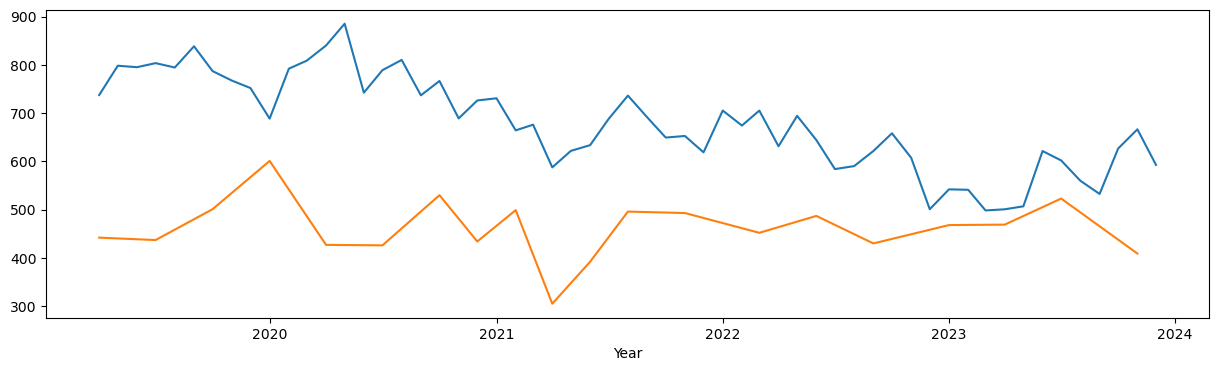

In [139]:
# Time trend plots
plt.figure(figsize=(15, 4))
plt.plot(df_trend[df_trend['timestamp']>='2019-04-01']['timestamp'], df_trend[df_trend['timestamp']>='2019-04-01']['ground_truth'], label='Number of Tents')
plt.plot(df_sf['timestamp'], df_sf['sites'], label='SF Data')
#plt.plot(df_pit['year'], df_pit['unsheltered'], 'ro-', label='PIT Count')
plt.xlabel('Year')
plt.show()

In [140]:
df_sf

,year,month,tents,structure,sites,timestamp,tent_struc
0,2019,4,207,173,442,2019-04-01,380
1,2019,7,264,187,437,2019-07-01,451
2,2019,10,272,175,501,2019-10-01,447
3,2020,1,459,190,601,2020-01-01,649
4,2020,4,897,211,427,2020-04-01,1108
5,2020,7,790,213,426,2020-07-01,1003
6,2020,10,434,269,530,2020-10-01,703
7,2020,12,349,216,434,2020-12-01,565
8,2021,2,333,168,499,2021-02-01,501
9,2021,4,289,94,305,2021-04-01,383


In [142]:
df_compare = pd.merge(df_sf, df_trend, on='timestamp', how='left')

In [144]:
# Correlation between ground_truth and tents
print(df_compare['ground_truth'].corr(df_sf['tents']))

# Correlation between ground_truth and structure
print(df_compare['ground_truth'].corr(df_sf['structure']))

# Correlation between ground_truth and tent_struc
print(df_compare['ground_truth'].corr(df_sf['tent_struc']))

# Correlation between ground_truth and sites
print(df_compare['ground_truth'].corr(df_sf['sites']))

0.341118412072705
0.4776897903285603
0.39685724388407945
0.08699434915859505


In [145]:
# Correlation between ground_truth and tents
print(df_compare['ground_truth_bin'].corr(df_sf['tents']))

# Correlation between ground_truth and structure
print(df_compare['ground_truth_bin'].corr(df_sf['structure']))

# Correlation between ground_truth and tent_struc
print(df_compare['ground_truth_bin'].corr(df_sf['tent_struc']))

# Correlation between ground_truth and sites
print(df_compare['ground_truth_bin'].corr(df_sf['sites']))

0.3481735507493203
0.4807289553015323
0.4037664418909481
0.03582274983422229


/Users/wooyongjung/anaconda3/envs/homeless_env/lib/python3.11/site-packages/geoplot/geoplot.py:56: UserWarning: The data being passed to "hue" includes null values. You probably want to remove these before plotting this data with geoplot.
  warnings.warn(


<Axes: >

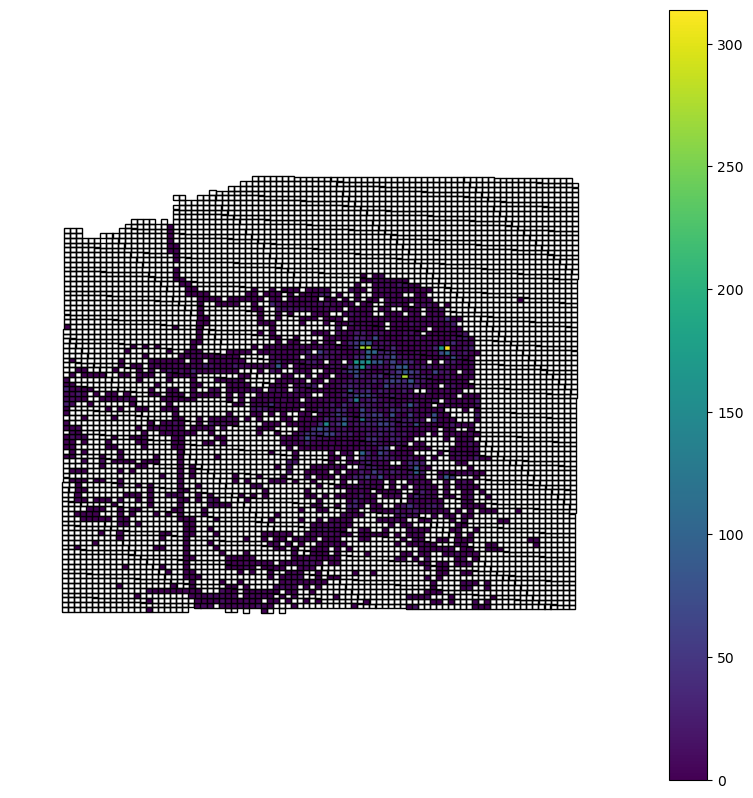

In [103]:
# Extract only 2022 data
df_2021 = df_combined2[df_combined2['year']==2021]
df_2021_grp = df_2021[['bboxid','ground_truth']].groupby('bboxid').sum()
df_2021_grp = df_2021_grp.reset_index()
df_2021_loc = df_2021[['bboxid','geometry_bbox']].drop_duplicates()
df_2021_loc = df_2021_loc.reset_index(drop=True)
df_2021_grp = pd.merge(df_2021_grp, df_2021_loc, on='bboxid', how='left')
df_2021_grp.shape

# Merge df_2022_grp and df_bboxid
df_2021_grp = pd.merge(df_2021_grp[['bboxid','ground_truth']], df_bboxid[['bboxid','geometry']], on='bboxid', how='right')

# Convert df_2022_grp to GeoDataFrame
df_2021_grp = gpd.GeoDataFrame(df_2021_grp, geometry='geometry', crs=4326)

gplt.choropleth(df_2021_grp, hue='ground_truth', cmap='viridis', figsize=(10, 10), legend=True)baa

/Users/wooyongjung/anaconda3/envs/homeless_env/lib/python3.11/site-packages/geoplot/geoplot.py:56: UserWarning: The data being passed to "hue" includes null values. You probably want to remove these before plotting this data with geoplot.
  warnings.warn(


<Axes: >

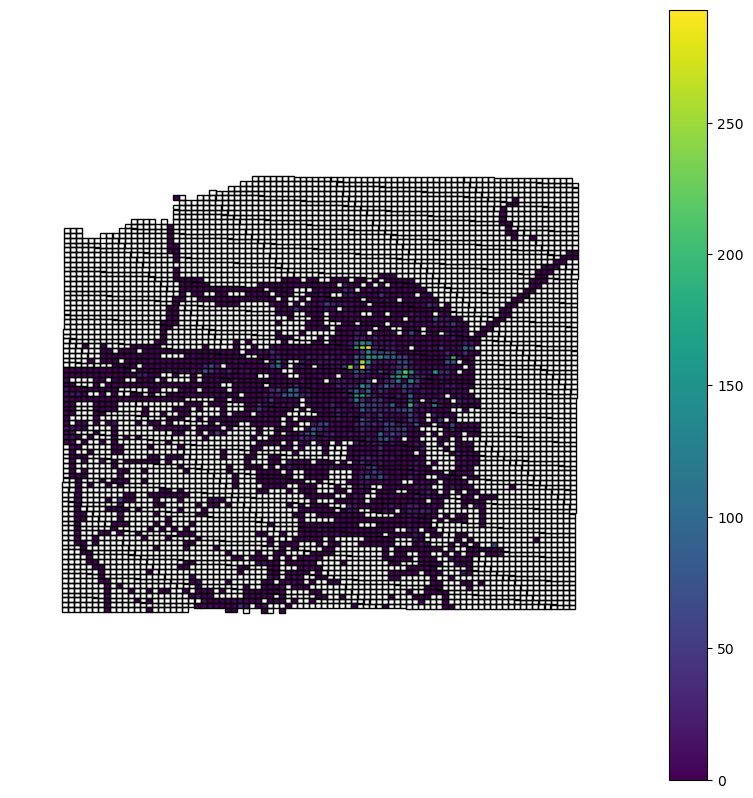

In [104]:
# Extract only 2023 data
df_2023 = df_combined2[df_combined2['year']==2023]
df_2023_grp = df_2023[['bboxid','ground_truth']].groupby('bboxid').sum()
df_2023_grp = df_2023_grp.reset_index()
df_2023_loc = df_2023[['bboxid','geometry_bbox']].drop_duplicates()
df_2023_loc = df_2023_loc.reset_index(drop=True)
df_2023_grp = pd.merge(df_2023_grp, df_2023_loc, on='bboxid', how='left')
df_2023_grp.shape

# Merge df_2022_grp and df_bboxid
df_2023_grp = pd.merge(df_2023_grp[['bboxid','ground_truth']], df_bboxid[['bboxid','geometry']], on='bboxid', how='right')

# Convert df_2022_grp to GeoDataFrame
df_2023_grp = gpd.GeoDataFrame(df_2023_grp, geometry='geometry', crs=4326)

gplt.choropleth(df_2023_grp, hue='ground_truth', cmap='viridis', figsize=(10, 10), legend=True)

In [ ]:
# Load bbox dataset
df_bbox = pd.read_csv('data/df_bbox_99.csv')

# Select the rows with GEOID starting with 06075 (San Francisci County)
df_bbox['GEOID'] = df_bbox['GEOID'].astype(str)

# Add 0 to the beginning of GEOID
df_bbox['GEOID'] = df_bbox['GEOID'].apply(lambda x: x.zfill(12))
df_bbox = df_bbox[df_bbox['GEOID'].str.startswith('06075')]

# Reset index
df_bbox.reset_index(inplace=True, drop=True)

# Drop the first column Unnamed: 0
df_bbox = df_bbox.drop(['Unnamed: 0'], axis=1)

# Create bboxid column
df_bbox['bboxid'] = 'bbox_' + df_bbox.row_num.astype(str) + '_' +df_bbox.col_num.astype(str)

# Merge the main data frame with the bbox data frame
df_geo = pd.merge(df_geo, df_bbox[['bboxid','swne_edges','center_latlon']], on='bboxid', how='left')


## Sparse Variational Gaussian Processes (SVGPs)

In [ ]:
#!pip install gpytorch

In [478]:
import torch
import gpytorch

In [490]:
# Generate toy spatio-temporal data
np.random.seed(42)

n_samples = 100
X_spatial = np.random.rand(n_samples, 2) * 6 - 3 # Spatial coordinates in range [-3, 3]
X_time = np.linspace(0, 10, n_samples)[:, np.newaxis] # Time in range [0, 10]
X = np.hstack([X_spatial, X_time])

# True latent function: Sum of sinusoids in space and time
f = np.sin(X[:,0]) + np.sin(X[:,1]) + np.sin(X[:,2])

# Generate counts (Poisson)
Y = np.random.poisson(lam=np.exp(f))

In [498]:
# Convert data to PyTorch tensors
train_x = torch.tensor(X, dtype=torch.float32)
train_y = torch.tensor(Y.squeeze(), dtype=torch.float32)

In [499]:
# Define tye GP model with a variational approach for spatio-temporal input
class SpatioTemporalSVGPModel(gpytorch.models.ApproximateGP):
    def __init__(self, inducing_points):
        variational_distribution = gpytorch.variational.CholeskyVariationalDistribution(inducing_points.size(0))
        variational_strategy = gpytorch.variational.VariationalStrategy(self, inducing_points, variational_distribution, learn_inducing_locations=True)

        super(SpatioTemporalSVGPModel, self).__init__(variational_strategy)

        # Define the combined kernel for spatial and temporal components
        self.mean_module = gpytorch.means.ConstantMean()

        # RBF kernel for spatial dimensions (x, y) and time (t)
        self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel(ard_num_dims=3))
                
    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultitaskMultivariateNormal(mean_x, covar_x)
    
# Define likelihood for Poisson regression
class PoissonLikelihood(gpytorch.likelihoods.Likelihood):
    def forward(self, function_samples, *args, **kwargs):
        # Apply the lig-link function (exponentiate the latent GP)
        return torch.distributions.Poisson(rate=function_samples.exp())

In [ ]:
# Number of inducing points (m << n)
num_inducing_points = 10
# Select random inducing points from the spatio-temporal training data
inducing_points = train_x[::10]

#Initialize the Spatio-Temporal SVGP model
model = SpatioTemporalSVGPModel(inducing_points)
likelihood = PoissonLikelihood()

# Set the model in training mode
model.train()
likelihood.train()

# Use Adam optimizer
optimizer = torch.optim.Adam([{'params': model.parameters()}, {'params': likelihood.parameters()}], lr=0.01)

# Define the loss (Variational ELBO)
mll = gpytorch.mlls.VariationalELBO(likelihood, model, train_y.numel())

# Training loop
training_iterations = 100
for i in range(training_iterations):
    optimizer.zero_grad()
    output = model(train_x)
    loss = -mll(output, train_y)
    loss.backward()
    optimizer.step()

    if i%10 == 0:
        print(f'Iteration {i}/{training_iterations} - Loss: {loss.item()}')

In [480]:
X_spatial

array([[-0.75275929,  2.70428584],
       [ 1.39196365,  0.59195091],
       [-2.06388816, -2.06403288],
       [-2.65149833,  2.19705687],
       [ 0.60669007,  1.24843547],
       [-2.87649303,  2.81945911],
       [ 1.99465584, -1.72596534],
       [-1.9090502 , -1.89957294],
       [-1.17454654,  0.14853859],
       [-0.40832989, -1.25262516],
       [ 0.67111737, -2.16303684],
       [-1.24713211, -0.80182894],
       [-0.26358009,  1.71105577],
       [-1.80195731,  0.08540663],
       [ 0.55448741, -2.72129752],
       [ 0.64526911, -1.97685526],
       [-2.60969044,  2.69331322],
       [ 2.7937922 ,  1.85038409],
       [-1.17231738, -2.41396732],
       [ 1.10539816, -0.35908504],
       [-2.26777059, -0.02893854],
       [-2.79366887,  2.45592241],
       [-1.44732011,  0.97513371],
       [-1.12973354,  0.12040813],
       [ 0.28026168, -1.89087327],
       [ 2.81750777,  1.65079694],
       [ 2.63699365,  2.3689641 ],
       [ 0.58739987,  2.53124541],
       [-2.46904499,

In [481]:
np.random.rand(n_samples, 2)

array([[0.64203165, 0.08413996],
       [0.16162871, 0.89855419],
       [0.60642906, 0.00919705],
       [0.10147154, 0.66350177],
       [0.00506158, 0.16080805],
       [0.54873379, 0.6918952 ],
       [0.65196126, 0.22426931],
       [0.71217922, 0.23724909],
       [0.3253997 , 0.74649141],
       [0.6496329 , 0.84922341],
       [0.65761289, 0.5683086 ],
       [0.09367477, 0.3677158 ],
       [0.26520237, 0.24398964],
       [0.97301055, 0.39309772],
       [0.89204656, 0.63113863],
       [0.7948113 , 0.50263709],
       [0.57690388, 0.49251769],
       [0.19524299, 0.72245212],
       [0.28077236, 0.02431597],
       [0.6454723 , 0.17711068],
       [0.94045858, 0.95392858],
       [0.91486439, 0.3701587 ],
       [0.01545662, 0.92831856],
       [0.42818415, 0.96665482],
       [0.96361998, 0.85300946],
       [0.29444889, 0.38509773],
       [0.85113667, 0.31692201],
       [0.16949275, 0.55680126],
       [0.93615477, 0.6960298 ],
       [0.57006117, 0.09717649],
       [0.

In [142]:
type(df_311_mapi)

geopandas.geodataframe.GeoDataFrame

In [144]:
type(df_geo_bbox)

geopandas.geodataframe.GeoDataFrame

In [145]:
df_311_mapi.head(3)

,timestamp,category,Point,latitude,longitude,ground_truth,source,geometry,geometry_bbox,bboxid
0,2016-01-01 12:31:03,Encampments,"(37.74176025, -122.42236328)",37.741760,-122.422363,1,311,POINT (-122.42236 37.74176),POLYGON ((-122.4240184421711 37.74061071995028...,bbox_25_48
1,2016-01-01 14:25:25,Encampments,"(37.78783387, -122.39168426)",37.787834,-122.391684,1,311,POINT (-122.39168 37.78783),POLYGON ((-122.3925883448746 37.78686969597758...,bbox_57_65
2,2016-01-01 17:29:12,Homeless Concerns,"(37.76065501, -122.41327856)",37.760655,-122.413279,1,311,POINT (-122.41328 37.76066),"POLYGON ((-122.4147373862871 37.7594218699682,...",bbox_38_53


In [147]:
df_geo_bbox_temp.head(3)

,bboxid,geometry_bbox
0,bbox_10_14,POLYGON ((-122.4862707014277 37.71914041535512...
1,bbox_10_15,POLYGON ((-122.4844446961059 37.71913244432333...
2,bbox_10_16,POLYGON ((-122.4826186915052 37.71912444501167...


In [165]:
# Convert df_geo_bbox_temp to GeoDataFrame
df_geo_bbox_temp = gpd.GeoDataFrame(df_geo_bbox_temp, geometry=df_geo_bbox_temp['geometry_bbox'], crs=4326)

# Convert df_311_mapi to GeoDataFrame
df_311_mapi = gpd.GeoDataFrame(df_311_mapi, geometry=gpd.points_from_xy(df_311_mapi.longitude, df_311_mapi.latitude), crs=4326)

In [466]:
print(df_geo_bbox_temp.shape)
print(df_311_mapi.shape)

(4156, 2)
(249675, 7)


In [168]:
df_311_mapi.head(3)

,timestamp,category,Point,latitude,longitude,ground_truth,source,geometry,geometry_bbox,bboxid
0,2016-01-01 12:31:03,Encampments,"(37.74176025, -122.42236328)",37.741760,-122.422363,1,311,POINT (-122.42236 37.74176),POLYGON ((-122.4240184421711 37.74061071995028...,bbox_25_48
1,2016-01-01 14:25:25,Encampments,"(37.78783387, -122.39168426)",37.787834,-122.391684,1,311,POINT (-122.39168 37.78783),POLYGON ((-122.3925883448746 37.78686969597758...,bbox_57_65
2,2016-01-01 17:29:12,Homeless Concerns,"(37.76065501, -122.41327856)",37.760655,-122.413279,1,311,POINT (-122.41328 37.76066),"POLYGON ((-122.4147373862871 37.7594218699682,...",bbox_38_53


In [170]:
df_geo_bbox_temp.head(3)

,bboxid,geometry_bbox,geometry
0,bbox_10_14,POLYGON ((-122.4862707014277 37.71914041535512...,"POLYGON ((-122.48627 37.71914, -122.48443 37.7..."
1,bbox_10_15,POLYGON ((-122.4844446961059 37.71913244432333...,"POLYGON ((-122.48444 37.71913, -122.48261 37.7..."
2,bbox_10_16,POLYGON ((-122.4826186915052 37.71912444501167...,"POLYGON ((-122.48262 37.71912, -122.48078 37.7..."


In [169]:
df_test[['geometry_bbox_left','geometry_bbox_right']]

,geometry_bbox_left,geometry_bbox_right
0,POLYGON ((-122.4240184421711 37.74061071995028...,POLYGON ((-122.4240184421711 37.74061071995028...
1,POLYGON ((-122.3925883448746 37.78686969597758...,POLYGON ((-122.3925883448746 37.78686969597758...
2,"POLYGON ((-122.4147373862871 37.7594218699682,...","POLYGON ((-122.4147373862871 37.7594218699682,..."
3,POLYGON ((-122.4183231796997 37.76814277381044...,POLYGON ((-122.4183231796997 37.76814277381044...
4,POLYGON ((-122.4236696377114 37.78557531065928...,POLYGON ((-122.4236696377114 37.78557531065928...
...,...,...
249670,None,POLYGON ((-122.4019135552491 37.76370906137726...
249671,None,POLYGON ((-122.4952038216226 37.74818974695868...
249672,None,POLYGON ((-122.4351868813149 37.71310459620715...
249673,None,POLYGON ((-122.4055677062686 37.76372755004274...


In [163]:
df_test[df_test['geometry_bbox_right'].isnull()]

,timestamp,category,Point,latitude,longitude,ground_truth,source,geometry,geometry_bbox_left,bboxid_left,index_right,bboxid_right,geometry_bbox_right
36,2016-01-02 11:32:48,Encampments,"(37.78783798, -122.42156219)",37.787838,-122.421562,1,311,POINT (-122.42156 37.78784),None,None,NaN,NaN,NaN
61,2016-01-02 17:25:53,Encampments,"(37.77385484, -122.41455612)",37.773855,-122.414556,1,311,POINT (-122.41456 37.77385),None,None,NaN,NaN,NaN
97,2016-01-03 13:12:41,Homeless Concerns,"(37.78565822, -122.41418757)",37.785658,-122.414188,1,311,POINT (-122.41419 37.78566),None,None,NaN,NaN,NaN
112,2016-01-03 14:49:53,Homeless Concerns,"(37.776816, -122.41271)",37.776816,-122.412710,1,311,POINT (-122.41271 37.77682),None,None,NaN,NaN,NaN
121,2016-01-03 15:16:40,Encampments,"(37.79456022, -122.41310975)",37.794560,-122.413110,1,311,POINT (-122.41311 37.79456),None,None,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249625,2023-12-30 15:50:00,Encampments,"(37.783556, -122.420865)",37.783556,-122.420865,1,311,POINT (-122.42087 37.78356),None,None,NaN,NaN,NaN
249631,2023-12-30 09:30:00,Encampments,"(37.78359195, -122.41907517)",37.783592,-122.419075,1,311,POINT (-122.41908 37.78359),None,None,NaN,NaN,NaN
249643,2023-12-31 17:10:00,Encampments,"(37.7733933, -122.4435389)",37.773393,-122.443539,1,311,POINT (-122.44354 37.77339),None,None,NaN,NaN,NaN
249665,2023-12-31 16:46:00,Encampments,"(37.78537288, -122.4146371)",37.785373,-122.414637,1,311,POINT (-122.41464 37.78537),None,None,NaN,NaN,NaN


In [157]:
df_311_mapi.head(3)

,timestamp,category,Point,latitude,longitude,ground_truth,source,geometry,geometry_bbox,bboxid
0,2016-01-01 12:31:03,Encampments,"(37.74176025, -122.42236328)",37.741760,-122.422363,1,311,POINT (-122.42236 37.74176),POLYGON ((-122.4240184421711 37.74061071995028...,bbox_25_48
1,2016-01-01 14:25:25,Encampments,"(37.78783387, -122.39168426)",37.787834,-122.391684,1,311,POINT (-122.39168 37.78783),POLYGON ((-122.3925883448746 37.78686969597758...,bbox_57_65
2,2016-01-01 17:29:12,Homeless Concerns,"(37.76065501, -122.41327856)",37.760655,-122.413279,1,311,POINT (-122.41328 37.76066),"POLYGON ((-122.4147373862871 37.7594218699682,...",bbox_38_53


In [164]:
df_311_mapi['latitude'][1]

37.78783387

In [159]:
print(df_311_mapi.shape)
print(df_geo_bbox_temp.shape)

(249675, 10)
(4156, 3)


In [158]:
df_geo_bbox_temp.head(3)

,bboxid,geometry_bbox,geometry
0,bbox_10_14,POLYGON ((-122.4862707014277 37.71914041535512...,"POLYGON ((-122.48627 37.71914, -122.48443 37.7..."
1,bbox_10_15,POLYGON ((-122.4844446961059 37.71913244432333...,"POLYGON ((-122.48444 37.71913, -122.48261 37.7..."
2,bbox_10_16,POLYGON ((-122.4826186915052 37.71912444501167...,"POLYGON ((-122.48262 37.71912, -122.48078 37.7..."


In [160]:
type(df_geo_bbox_temp)

geopandas.geodataframe.GeoDataFrame

In [52]:
# # Save the main data frame
# df_combined.to_csv('data/df_combined.csv', index=False)

In [54]:
# Load San Francisco Census Block Group shapefile
data_path = '/Users/wooyongjung/WJ_Projects/HomelessStudy_SanFrancisco_2024/data/tl_2021_06_bg/tl_2021_06_bg.shp'
census_bg = gpd.read_file(data_path)
census_bg = census_bg.to_crs(crs=4326)
census_bg = census_bg[census_bg['GEOID'].str.startswith('06075')]
census_bg = census_bg[['GEOID', 'geometry']]

# Load San Francisco Census Block Group shapefile
df_bg = df[['geoid']]

# Drop duplicates
df_bg = df_bg.drop_duplicates(subset=['geoid'], keep='first')

# Add 0 to the beginning of GEOID
df_bg['geoid'] = df_bg['geoid'].astype(str)
df_bg['geoid'] = df_bg['geoid'].apply(lambda x: x.zfill(12))

# Merge df_bg and census_bg
df_bg = pd.merge(df_bg, census_bg, left_on='geoid', right_on='GEOID', how='left')

# Convert df_bg to GeoDataFrame
df_bg = gpd.GeoDataFrame(df_bg, crs=4326)


In [55]:
df_combined

,timestamp,latitude,longitude,ground_truth,category,source,geometry
0,2016-01-01 01:29:52,37.765645,-122.416334,1.0,Encampments,311,POINT (-122.41633 37.76565)
1,2016-01-01 02:29:32,37.758794,-122.428535,0.0,Homeless Tents,Mapillary,POINT (-122.42853 37.75879)
2,2016-01-01 08:42:49,37.775505,-122.413570,1.0,Encampments,311,POINT (-122.41357 37.77550)
3,2016-01-01 09:36:50,37.787531,-122.394309,1.0,Homeless Concerns,311,POINT (-122.39431 37.78753)
4,2016-01-01 09:39:51,37.761330,-122.434860,1.0,Homeless Concerns,311,POINT (-122.43486 37.76133)
...,...,...,...,...,...,...,...
364528,2023-12-31 20:33:00,37.748303,-122.418045,1.0,Encampments,311,POINT (-122.41805 37.74830)
364529,2023-12-31 20:55:00,37.785275,-122.393996,1.0,Encampments,311,POINT (-122.39400 37.78527)
364530,2023-12-31 21:28:00,37.780657,-122.419766,1.0,Encampments,311,POINT (-122.41977 37.78066)
364531,2023-12-31 22:00:00,37.775620,-122.440506,1.0,Encampments,311,POINT (-122.44051 37.77562)


In [56]:
df_combined['ground_truth'].value_counts()

ground_truth
1.0    251465
0.0    113068
Name: count, dtype: int64